In [1]:
#初步搭建神经网络
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
import tensorflow.examples.tutorials.mnist.input_data as input_data

In [3]:
mnist = input_data.read_data_sets('MNIST_data/',one_hot = True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [4]:
print('train',mnist.train.num_examples,
         ',validation',mnist.validation.num_examples,
         ',test',mnist.test.num_examples)

train 55000 ,validation 5000 ,test 10000


In [5]:
print('train images shape:',mnist.train.images.shape,
     'labels shape',mnist.train.labels.shape)

train images shape: (55000, 784) labels shape (55000, 10)


In [6]:
def plot_image(image):
    plt.imshow(image.reshape(28,28),cmap = 'binary')
    plt.show()

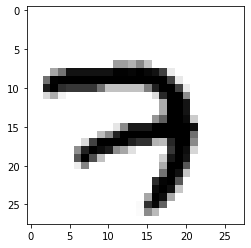

In [7]:
plot_image(mnist.train.images[0])

In [8]:
print(mnist.train.labels[0])
print(np.argmax(mnist.train.labels[0]))

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
7


In [46]:
#定义变量，占位符，参数
x = tf.placeholder(tf.float32,[None,784])
y = tf.placeholder(tf.float32,[None,10])
w = tf.Variable(tf.random_normal([784,10]))
b = tf.Variable(tf.random_normal([10]))
#定义前向函数
fore = tf.matmul(x,w)+b
pre = tf.nn.softmax(fore)

In [10]:
#定义超参数
train_epoch = 50
learning_rate = 0.01
batch_size= 100
total_batch = int(mnist.train.num_examples/batch_size)
display_step = 1


In [47]:
#定义损失函数和优化器
loss = tf.reduce_mean(-tf.reduce_sum(y*tf.log(pre),axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

In [12]:
correct_prediction = tf.equal(tf.argmax(pre,1),tf.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))

In [13]:
#初始化会话
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

In [14]:
#进行迭代训练
for epoch in range(train_epoch):
    for batch in range(batch_size):
        xs,ys = mnist.train.next_batch(batch_size)
        sess.run(optimizer,feed_dict = {x:xs,y:ys})
    loss_,acc = sess.run([loss,accuracy],feed_dict = {x:mnist.validation.images,y:mnist.validation.labels})
    if (epoch + 1) % display_step == 0:
        print('train epoch' ,(epoch +1),'loss',loss_,'accuray',acc)
print('finish')

train epoch 1 loss 9.842975769638313 accuray 0.1186
train epoch 2 loss 8.324627325618396 accuray 0.161
train epoch 3 loss 7.23943985077244 accuray 0.1996
train epoch 4 loss 6.379676563601798 accuray 0.2414
train epoch 5 loss 5.676160778687632 accuray 0.2872
train epoch 6 loss 5.105443432426397 accuray 0.3254
train epoch 7 loss 4.639467673756736 accuray 0.3614
train epoch 8 loss 4.264293345149088 accuray 0.3984
train epoch 9 loss 3.9487203691987713 accuray 0.4302
train epoch 10 loss 3.683098285806444 accuray 0.4594
train epoch 11 loss 3.453951494563906 accuray 0.4802
train epoch 12 loss 3.257459563120089 accuray 0.5002
train epoch 13 loss 3.092923736332336 accuray 0.5146
train epoch 14 loss 2.9426811967402777 accuray 0.5334
train epoch 15 loss 2.8112783231641507 accuray 0.5484
train epoch 16 loss 2.6953842902617713 accuray 0.5634
train epoch 17 loss 2.5893600165845636 accuray 0.5772
train epoch 18 loss 2.496503462634618 accuray 0.588
train epoch 19 loss 2.4088596590146203 accuray 0.5974

In [18]:
acc_test = sess.run(accuracy,feed_dict={x:mnist.test.images,y:mnist.test.labels})
print(acc_test)

0.7542


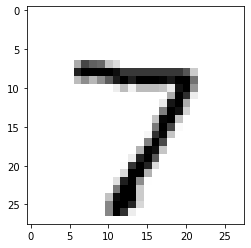

[7]


In [43]:
images = mnist.test.images[0]
plot_image(images)
images = images.reshape(-1,784)
result = sess.run(tf.argmax(pre,1),feed_dict = {x : images})
print(result)
